In [1]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 8.1 MB/s eta 0:00:00


# 1) Data Loading & Pre-processing

In [2]:
import pandas as pd
df = pd.read_excel("/kaggle/input/nlp-dataset/Main.xlsx")

In [3]:
df.head()

,Batch,Source Language,ID,Type,Text,English MT,Arabic MT,Annotator ID,Bias,Propaganda,Type of Propaganda,Type of Bias,Comments
0,B01,English,1,MAIN,Yemen's Houthis have waded into the Israel-Ham...,Yemen's Houthis have waded into the Israel-Ham...,خاض الحوثيون في اليمن الحرب بين إسرائيل وحماس ...,1.0,Biased against Palestine,Not Propaganda,Propaganda Not to be deleted,ضمني,NaN
1,B01,English,2,MAIN,Isreal - Hamas Conflict | Face to Face,Isreal - Hamas Conflict | Face to Face,إسرائيل - الصراع مع حماس | وجها لوجه,4.0,Unbiased,Not Propaganda,Not Propaganda,NaN,NaN
2,B01,English,4,MAIN,Videos show how armed men from Gaza stormed a ...,Videos show how armed men from Gaza stormed a ...,أظهرت مقاطع فيديو كيف اقتحم مسلحون من غزة مهرج...,3.0,Unbiased,Not Propaganda,Propaganda Not to be deleted,NaN,NaN
3,B01,English,7,MAIN,Protest in Aligarh Muslim University in suppor...,Protest in Aligarh Muslim University in suppor...,وقفة احتجاجية في جامعة عليكرة الإسلامية دعما ل...,5.0,Unbiased,Not Propaganda,Not Propaganda,NaN,NaN
4,B01,English,8,MAIN,IDF releases audio recording about misfired ro...,IDF releases audio recording about misfired ro...,الجيش الإسرائيلي ينشر تسجيلًا صوتيًا حول صاروخ...,2.0,Biased against Palestine,Propaganda,Propaganda Must be deleted,ضمني,NaN


In [4]:
df = df.drop(columns=['Comments'], errors='ignore')

In [5]:
df.head()

,Batch,Source Language,ID,Type,Text,English MT,Arabic MT,Annotator ID,Bias,Propaganda,Type of Propaganda,Type of Bias
0,B01,English,1,MAIN,Yemen's Houthis have waded into the Israel-Ham...,Yemen's Houthis have waded into the Israel-Ham...,خاض الحوثيون في اليمن الحرب بين إسرائيل وحماس ...,1.0,Biased against Palestine,Not Propaganda,Propaganda Not to be deleted,ضمني
1,B01,English,2,MAIN,Isreal - Hamas Conflict | Face to Face,Isreal - Hamas Conflict | Face to Face,إسرائيل - الصراع مع حماس | وجها لوجه,4.0,Unbiased,Not Propaganda,Not Propaganda,NaN
2,B01,English,4,MAIN,Videos show how armed men from Gaza stormed a ...,Videos show how armed men from Gaza stormed a ...,أظهرت مقاطع فيديو كيف اقتحم مسلحون من غزة مهرج...,3.0,Unbiased,Not Propaganda,Propaganda Not to be deleted,NaN
3,B01,English,7,MAIN,Protest in Aligarh Muslim University in suppor...,Protest in Aligarh Muslim University in suppor...,وقفة احتجاجية في جامعة عليكرة الإسلامية دعما ل...,5.0,Unbiased,Not Propaganda,Not Propaganda,NaN
4,B01,English,8,MAIN,IDF releases audio recording about misfired ro...,IDF releases audio recording about misfired ro...,الجيش الإسرائيلي ينشر تسجيلًا صوتيًا حول صاروخ...,2.0,Biased against Palestine,Propaganda,Propaganda Must be deleted,ضمني


In [6]:
df.columns

Index(['Batch', 'Source Language', 'ID', 'Type', 'Text', 'English MT',
       'Arabic MT', 'Annotator ID', 'Bias', 'Propaganda', 'Type of Propaganda',
       'Type of Bias'],
      dtype='object')

In [7]:
df = df.drop(columns=['Annotator ID', 'Text','Batch', 'ID', 'Type', 'Source Language', 'English MT',"Type of Bias","Propaganda","Type of Propaganda"], errors='ignore')

In [8]:
df.head()

,Arabic MT,Bias
0,خاض الحوثيون في اليمن الحرب بين إسرائيل وحماس ...,Biased against Palestine
1,إسرائيل - الصراع مع حماس | وجها لوجه,Unbiased
2,أظهرت مقاطع فيديو كيف اقتحم مسلحون من غزة مهرج...,Unbiased
3,وقفة احتجاجية في جامعة عليكرة الإسلامية دعما ل...,Unbiased
4,الجيش الإسرائيلي ينشر تسجيلًا صوتيًا حول صاروخ...,Biased against Palestine


In [9]:
total_rows = len(df)
print(f"Total number of rows: {total_rows}")

Total number of rows: 13500


In [10]:
df.isna().sum()

Arabic MT       0
Bias         2700
dtype: int64

In [11]:
import numpy as np

In [12]:
df.replace(['', 'None', 'nan'], np.nan, inplace=True)  
df.dropna(subset=['Bias'], inplace=True)

In [13]:
df.isna().sum()

Arabic MT    0
Bias         0
dtype: int64

In [14]:
df.head()

,Arabic MT,Bias
0,خاض الحوثيون في اليمن الحرب بين إسرائيل وحماس ...,Biased against Palestine
1,إسرائيل - الصراع مع حماس | وجها لوجه,Unbiased
2,أظهرت مقاطع فيديو كيف اقتحم مسلحون من غزة مهرج...,Unbiased
3,وقفة احتجاجية في جامعة عليكرة الإسلامية دعما ل...,Unbiased
4,الجيش الإسرائيلي ينشر تسجيلًا صوتيًا حول صاروخ...,Biased against Palestine


In [15]:
total_rows = len(df)
print(f"Total number of rows: {total_rows}")

Total number of rows: 10800


In [16]:
print(df['Bias'].cat.categories if df['Bias'].dtype.name == 'category' else df['Bias'].unique())

['Biased against Palestine' 'Unbiased' 'Unclear' 'Biased against others'
 'Biased against Israel' 'Biased against both Palestine and Israel'
 'Not Applicable']


In [17]:
columns_to_check = ['Bias']

for column in columns_to_check:
    print(f"Class counts for '{column}':")
    print(df[column].value_counts())
    print("\n")

Class counts for 'Bias':
Bias
Unbiased                                    6817
Biased against Palestine                    2900
Unclear                                      432
Biased against Israel                        281
Biased against others                        203
Not Applicable                               120
Biased against both Palestine and Israel      47
Name: count, dtype: int64




In [18]:
!pip install emoji

In [19]:
import re
import emoji

def preprocess_text(text):
    # Ensure text is a string
    text = str(text)
    
    # 1. Remove hashtags
    text = re.sub(r'#\w+', '', text)
    
    # 2. Remove full URLs with protocols (e.g., "http://example.com")
    text = re.sub(r'https?://\S+|www\.\S+|bit\.ly\S*', '', text)
    
    # 3. Remove standalone paths without protocols (e.g., "/content/kan-news/defense/629514/")
    text = re.sub(r'/\S+', '', text)
    
    # 4. Remove emails
    text = re.sub(r'\S+@\S+', '', text)
    
    # 5. Remove emojis
    text = emoji.replace_emoji(text, replace='')
    
    # 6. Remove diacritics
    arabic_diacritics = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(arabic_diacritics, '', text)
    
    # 7. Remove Tatweel (ـ)
    text = re.sub(r'ـ', '', text)
    
    # 8. Normalize Arabic text
    text = re.sub(r'[إأآا]', 'ا', text)  # Unify Alif variants
    text = re.sub(r'ة', 'ه', text)  # Replace Taa Marbuta with Haa
    text = re.sub(r'ى', 'ي', text)  # Replace Alef Maqsura with Ya
    
    # 9. Remove repeated characters (e.g., "ممتتتاز" → "ممتاز")
    text = re.sub(r'(.)\1+', r'\1', text)
    
    # Return cleaned text
    return text

In [20]:
df['Arabic MT'] = df['Arabic MT'].apply(preprocess_text)

In [21]:
df['Arabic MT'][9022]

'اولا علي قناه ABC: جلست المرشحه الرئاسيه الجمهوريه نيكي هيلي مع لينسي ديفيس من قناه ABC News، حيث ناقشت مجموعه واسعه من المواضيع بما في ذلك الرئيس السابق. ترامب والحرب بين اسرائيل وحماس والاجهاض وحياتها قبل ان تظهر امام الجمهور. اقرا المزيد: '

In [23]:
import matplotlib.pyplot as plt

# Handling imbalanced dataset

In [24]:
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE
import numpy as np

model = SentenceTransformer("intfloat/multilingual-e5-large")

X = df['Arabic MT']
y = df['Bias']

X_embeddings = model.encode(X.tolist(), convert_to_numpy=True)

X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, stratify=y, random_state=42)

modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/160k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

Batches:   0%|          | 0/338 [00:00<?, ?it/s]

In [25]:
from imblearn.over_sampling import BorderlineSMOTE

borderline_smote = BorderlineSMOTE(random_state=42)
X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train, y_train)

print("Class distribution after Borderline-SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution after Borderline-SMOTE:
Bias
Unbiased                                    5454
Biased against Palestine                    5454
Unclear                                     5454
Biased against Israel                       5454
Biased against others                       5454
Biased against both Palestine and Israel    5454
Not Applicable                              5454
Name: count, dtype: int64


In [26]:
from sklearn.metrics.pairwise import cosine_similarity

original_embeddings = X_train
synthetic_embeddings = X_train_resampled[len(X_train):]

cos_sim = cosine_similarity(original_embeddings, synthetic_embeddings)
average_similarity = np.mean(np.max(cos_sim, axis=0))
print(f"Average Cosine Similarity of Synthetic Samples: {average_similarity:.4f}")

if average_similarity < 0.7:
    print("Warning: Synthetic samples are significantly different from the original data.")
else:
    print("Synthetic samples appear similar to the original data.")

Average Cosine Similarity of Synthetic Samples: 0.9886
Synthetic samples appear similar to the original data.


## Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_final, y_train_final)

y_pred = rf_model.predict(X_val)

print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))


Classification Report:
                                          precision    recall  f1-score   support

                   Biased against Israel       1.00      0.98      0.99      1082
                Biased against Palestine       0.79      0.81      0.80      1108
Biased against both Palestine and Israel       1.00      1.00      1.00      1099
                   Biased against others       1.00      0.99      0.99      1078
                          Not Applicable       0.99      0.99      0.99      1079
                                Unbiased       0.77      0.79      0.78      1107
                                 Unclear       0.99      0.97      0.98      1083

                                accuracy                           0.93      7636
                               macro avg       0.93      0.93      0.93      7636
                            weighted avg       0.93      0.93      0.93      7636

Confusion Matrix:
[[1065    0    0    0    0   17    0]
 [   0  903    1

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
f1 = f1_score(y_val, y_pred, average='weighted')
print(f"Weighted F1 Score: {f1:.4f}")

Weighted F1 Score: 0.9323


## Bi-LSTM/GRU with Attention

Num GPUs Available:  2
TensorFlow is using the GPU!


Batches:   0%|          | 0/338 [00:00<?, ?it/s]

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1194/1194 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1485 - loss: 2.5997 - val_accuracy: 0.0398 - val_loss: 1.9540 - learning_rate: 0.0010
Epoch 2/10
1194/1194 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1464 - loss: 1.9460 - val_accuracy: 0.0259 - val_loss: 1.9445 - learning_rate: 0.0010
Epoch 3/10
1194/1194 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1393 - loss: 1.9461 - val_accuracy: 0.6310 - val_loss: 1.9316 - learning_rate: 0.0010
Epoch 4/10
1194/1194 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1362 - loss: 1.9461 - val_accuracy: 0.0398 - val_loss: 1.9530 - learning_rate: 0.0010
Epoch 5/10
1194/1194 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1391 - loss: 1.9460 - val_accuracy: 0.0259 - val_loss: 1.9497 - learning_rate: 0.0010
Epoch 6/10
1185/1194 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1415 - loss: 1.9460
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1194/1194 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1415 - loss: 1.9460

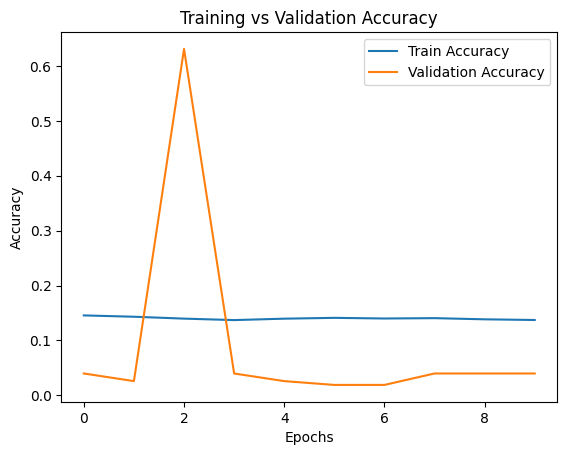

In [29]:
import pandas as pd
import re
import emoji
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE
from sentence_transformers import SentenceTransformer
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, GRU, Dense, Attention, Dropout, Lambda
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
if len(tf.config.experimental.list_physical_devices('GPU')) > 0:
    print("TensorFlow is using the GPU!")
else:
    print("No GPU detected. TensorFlow will use the CPU.")

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    except RuntimeError as e:
        print(e)

X = df['Arabic MT']
y = df['Bias']

embedding_model = SentenceTransformer("intfloat/multilingual-e5-large")
X_embeddings = embedding_model.encode(X.tolist(), convert_to_numpy=True)

X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, stratify=y, random_state=42)

borderline_smote = BorderlineSMOTE(random_state=42)
X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train, y_train)

label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

def create_model(input_dim, output_dim):
    inputs = Input(shape=(input_dim,))
    x = Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)  # Add sequence dimension
    x = Bidirectional(GRU(64, return_sequences=True, kernel_regularizer=l2(0.01)))(x)  # Regularized GRU
    attention = Attention()([x, x])  # Attention mechanism
    x = Lambda(lambda x: tf.reduce_sum(x, axis=1))(attention)  # Combine attended features
    x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)  # Regularized Dense Layer
    x = Dropout(0.5)(x)  # Increased dropout rate
    outputs = Dense(output_dim, activation='softmax')(x)
    return Model(inputs, outputs)

input_dim = X_train_resampled.shape[1] 
output_dim = len(label_encoder.classes_)
model = create_model(input_dim, output_dim)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    X_train_resampled, y_train_resampled_encoded,
    validation_data=(X_test, y_test_encoded),
    epochs=10,
    batch_size=32,
    callbacks=[reduce_lr]
)

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
print("Training Accuracy per Epoch:", training_accuracy)
print("Validation Accuracy per Epoch:", validation_accuracy)

test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_accuracy:.4f}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


In [32]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

avg_training_accuracy = np.mean(training_accuracy)
print(f"Average Training Accuracy: {avg_training_accuracy:.4f}")


Average Training Accuracy: 0.1403


## SILMA 

In [ ]:
model_id = "silma-ai/SILMA-9B-Instruct-v1.0"
quantization_config = BitsAndBytesConfig(load_in_4bit=True)

tokenizer = AutoTokenizer.from_pretrained(model_id)
llm_model = AutoModelForCausalLM.from_pretrained(
    model_id,
    quantization_config=quantization_config,
).to("cuda")

def classify_bias_with_llm(text):
    messages = [
        {"role": "system", "content": "You are an intelligent assistant trained to analyze Arabic text and classify its bias."},
        {"role": "user", "content": f"""
The provided text is in Arabic. Analyze it and classify the bias into one of the following categories:
- **Unbiased**
- **Biased against Palestine**
- **Biased against Israel**
- **Biased against both Palestine and Israel**
- **Biased against others**
- **Unclear**
- **Not Applicable**

Text:
{text}

Please classify the text into one of the above categories only and do not provide any brief explanation of your classification.
        """}
    ]

    input_ids = tokenizer.apply_chat_template(messages, return_tensors="pt", return_dict=True).to("cuda")
    outputs = llm_model.generate(**input_ids, max_new_tokens=256)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)


    try:
        classification = response.split(":")[-1].strip()
        return classification
    except Exception as e:
        return "Unclear" 


df['Prediction'] = df['Arabic MT'].apply(classify_bias_with_llm)

# Save to CSV
df[['Arabic MT', 'Bias', 'Prediction']].to_csv("classified_bias.csv", index=False)

print("Classification complete. Results saved to classified_bias.csv")